#### Active learning NNGP experiment
multiple params

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random

import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

from model.mlp import MLP
from dataloader.rosen import RosenData
from uncertainty_estimator.nngp import NNGP
from uncertainty_estimator.mcdue import MCDUE
from uncertainty_estimator.random_estimator import RandomEstimator
from sample_selector.eager import EagerSampleSelector
from oracle.identity import IdentityOracle
from al_trainer import ALTrainer

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False


In [3]:
# 4623457
config = {
    'random_seed': 4623457,
    'n_dim': 10,
    'n_train': 200,
    'n_val': 200,
    'n_test': 200,
    'n_pool': 1000,
    'layers': [128, 64, 32],
    'update_sample_size': 100,
    'al_iterations': 10
}



In [4]:
rmses = {}
for experiment in ['mcdue', 'random', 'nngp']:
    print("\n\nEXPERIMENT", experiment)

    # load data
    use_cache = config['random_seed'] is not None
    X_train, y_train, _, _, X_test, y_test, X_pool, y_pool = RosenData(
        config['n_train'], config['n_val'], config['n_test'], config['n_pool'], config['n_dim']
    ).dataset(use_cache=use_cache)


    # Init neural network & tf session
    tf.reset_default_graph()
    if config['random_seed'] is not None:
        tf.set_random_seed(config['random_seed'])
        np.random.seed(config['random_seed'])
        random.seed(config['random_seed'])

    model = MLP(
        ndim = config['n_dim'],
        random_state = config['random_seed'],
        layers = config['layers'])

    try:
        sess.close()
    except:
        pass

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    model.set_session(sess)
    if experiment == 'nngp':
        estimator = NNGP(model)  # to estimate uncertainties
        estimator.set_session(sess)
    elif experiment == 'random':
        estimator = RandomEstimator()
    elif experiment == 'mcdue':
        estimator = MCDUE(model)
    else:
        raise RuntimeError()

    oracle = IdentityOracle(y_pool)  # generate y for X from pool
    sampler = EagerSampleSelector(oracle) # sample X and y from pool by uncertainty estimations

    trainer = ALTrainer(model, estimator, sampler, oracle, config['al_iterations'], config['update_sample_size'])
    rmses[experiment] = trainer.train(X_train, y_train, X_test, y_test, X_test, y_test, X_pool)




EXPERIMENT mcdue
[100]  RMSE train:197.012  test:188.286  val:188.286  patience:3
[200]  RMSE train:191.303  test:182.487  val:182.487  patience:3
[300]  RMSE train:176.496  test:167.489  val:167.489  patience:3
[400]  RMSE train:146.776  test:137.465  val:137.465  patience:3
[500]  RMSE train:104.844  test:95.702  val:95.702  patience:3
[600]  RMSE train:73.457  test:67.161  val:67.161  patience:3
[700]  RMSE train:66.301  test:63.656  val:63.656  patience:3
[800]  RMSE train:65.849  test:64.289  val:64.289  patience:2
[900]  RMSE train:65.758  test:64.383  val:64.383  patience:1
[1000]  RMSE train:65.670  test:64.344  val:64.344  patience:0
No patience left at epoch 1000. Early stopping.
Uncertainties [61.91968275 71.48835189 77.7535292  65.02986088 65.09247113 65.76996314
 58.81265455 74.35532069 54.22327999 68.01101141 64.36110757 63.50884569
 60.42976966 54.098838   57.90383635 68.48884287 72.14891394 62.28470103
 41.95807422 57.91434613]
Uncertainties [86.37656903 85.53631176 8

[100]  RMSE train:16.101  test:22.180  val:22.180  patience:3
[200]  RMSE train:15.332  test:22.117  val:22.117  patience:3
[300]  RMSE train:14.786  test:22.001  val:22.001  patience:3
[400]  RMSE train:14.316  test:21.889  val:21.889  patience:3
[500]  RMSE train:13.913  test:21.812  val:21.812  patience:3
[600]  RMSE train:13.537  test:21.767  val:21.767  patience:3
[700]  RMSE train:13.198  test:21.743  val:21.743  patience:3
[800]  RMSE train:12.875  test:21.684  val:21.684  patience:3
[900]  RMSE train:12.600  test:21.693  val:21.693  patience:2
[1000]  RMSE train:12.343  test:21.660  val:21.660  patience:3
[1100]  RMSE train:12.102  test:21.611  val:21.611  patience:3
[1200]  RMSE train:11.861  test:21.546  val:21.546  patience:3
[1300]  RMSE train:11.641  test:21.480  val:21.480  patience:3
[1400]  RMSE train:11.425  test:21.372  val:21.372  patience:3
[1500]  RMSE train:11.217  test:21.275  val:21.275  patience:3
[1600]  RMSE train:11.013  test:21.183  val:21.183  patience:3
[

[4000]  RMSE train:6.970  test:16.005  val:16.005  patience:3
[4100]  RMSE train:6.932  test:15.988  val:15.988  patience:3
[4200]  RMSE train:6.894  test:15.969  val:15.969  patience:3
[4300]  RMSE train:6.857  test:15.949  val:15.949  patience:3
[4400]  RMSE train:6.822  test:15.928  val:15.928  patience:3
[4500]  RMSE train:6.787  test:15.908  val:15.908  patience:3
[4600]  RMSE train:6.756  test:15.880  val:15.880  patience:3
[4700]  RMSE train:6.726  test:15.829  val:15.829  patience:3
[4800]  RMSE train:6.698  test:15.799  val:15.799  patience:3
[4900]  RMSE train:6.673  test:15.781  val:15.781  patience:3
[5000]  RMSE train:6.643  test:15.763  val:15.763  patience:3
[5100]  RMSE train:6.616  test:15.747  val:15.747  patience:3
[5200]  RMSE train:6.588  test:15.726  val:15.726  patience:3
[5300]  RMSE train:6.562  test:15.715  val:15.715  patience:3
[5400]  RMSE train:6.535  test:15.706  val:15.706  patience:3
[5500]  RMSE train:6.509  test:15.691  val:15.691  patience:3
[5600]  

[2800]  RMSE train:6.224  test:13.427  val:13.427  patience:3
[2900]  RMSE train:6.207  test:13.403  val:13.403  patience:3
[3000]  RMSE train:6.191  test:13.387  val:13.387  patience:3
[3100]  RMSE train:6.176  test:13.370  val:13.370  patience:3
[3200]  RMSE train:6.161  test:13.355  val:13.355  patience:3
[3300]  RMSE train:6.146  test:13.343  val:13.343  patience:3
[3400]  RMSE train:6.128  test:13.324  val:13.324  patience:3
[3500]  RMSE train:6.111  test:13.308  val:13.308  patience:3
[3600]  RMSE train:6.094  test:13.298  val:13.298  patience:3
[3700]  RMSE train:6.076  test:13.290  val:13.290  patience:3
[3800]  RMSE train:6.058  test:13.278  val:13.278  patience:3
[3900]  RMSE train:6.041  test:13.266  val:13.266  patience:3
[4000]  RMSE train:6.024  test:13.258  val:13.258  patience:3
[4100]  RMSE train:6.007  test:13.247  val:13.247  patience:3
[4200]  RMSE train:5.989  test:13.235  val:13.235  patience:3
[4300]  RMSE train:5.973  test:13.229  val:13.229  patience:3
[4400]  

[3100]  RMSE train:65.144  test:62.248  val:62.248  patience:3
[3200]  RMSE train:65.096  test:62.208  val:62.208  patience:3
[3300]  RMSE train:65.050  test:62.166  val:62.166  patience:3
[3400]  RMSE train:65.004  test:62.122  val:62.122  patience:3
[3500]  RMSE train:64.960  test:62.077  val:62.077  patience:3
[3600]  RMSE train:64.914  test:62.023  val:62.023  patience:3
[3700]  RMSE train:64.869  test:61.974  val:61.974  patience:3
[3800]  RMSE train:64.824  test:61.917  val:61.917  patience:3
[3900]  RMSE train:64.779  test:61.862  val:61.862  patience:3
[4000]  RMSE train:64.734  test:61.804  val:61.804  patience:3
[4100]  RMSE train:64.690  test:61.745  val:61.745  patience:3
[4200]  RMSE train:64.644  test:61.682  val:61.682  patience:3
[4300]  RMSE train:64.597  test:61.616  val:61.616  patience:3
[4400]  RMSE train:64.548  test:61.548  val:61.548  patience:3
[4500]  RMSE train:64.496  test:61.476  val:61.476  patience:3
[4600]  RMSE train:64.444  test:61.406  val:61.406  pat

[5300]  RMSE train:6.655  test:21.724  val:21.724  patience:3
[5400]  RMSE train:6.590  test:21.700  val:21.700  patience:3
[5500]  RMSE train:6.525  test:21.674  val:21.674  patience:3
[5600]  RMSE train:6.458  test:21.669  val:21.669  patience:3
[5700]  RMSE train:6.392  test:21.663  val:21.663  patience:3
[5800]  RMSE train:6.325  test:21.652  val:21.652  patience:3
[5900]  RMSE train:6.262  test:21.664  val:21.664  patience:2
[6000]  RMSE train:6.199  test:21.649  val:21.649  patience:3
[6100]  RMSE train:6.142  test:21.639  val:21.639  patience:3
[6200]  RMSE train:6.082  test:21.614  val:21.614  patience:3
[6300]  RMSE train:6.020  test:21.608  val:21.608  patience:3
[6400]  RMSE train:5.963  test:21.600  val:21.600  patience:3
[6500]  RMSE train:5.905  test:21.582  val:21.582  patience:3
[6600]  RMSE train:5.845  test:21.565  val:21.565  patience:3
[6700]  RMSE train:5.787  test:21.559  val:21.559  patience:3
[6800]  RMSE train:5.732  test:21.542  val:21.542  patience:3
[6900]  

[900]  RMSE train:7.796  test:16.235  val:16.235  patience:3
[1000]  RMSE train:7.713  test:16.193  val:16.193  patience:3
[1100]  RMSE train:7.629  test:16.151  val:16.151  patience:3
[1200]  RMSE train:7.545  test:16.128  val:16.128  patience:3
[1300]  RMSE train:7.464  test:16.109  val:16.109  patience:3
[1400]  RMSE train:7.378  test:16.102  val:16.102  patience:3
[1500]  RMSE train:7.296  test:16.087  val:16.087  patience:3
[1600]  RMSE train:7.217  test:16.078  val:16.078  patience:3
[1700]  RMSE train:7.139  test:16.087  val:16.087  patience:2
[1800]  RMSE train:7.067  test:16.087  val:16.087  patience:1
[1900]  RMSE train:6.991  test:16.099  val:16.099  patience:0
No patience left at epoch 1900. Early stopping.
Uncertainties [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Uncertainties [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration 10
[100]  RMSE train:8.246  test:16.134  val:16.134  patience:3
[200]  RMSE train:8.039  test:16.140  val:16.140  patience:2
[300]  RMSE tr

[4900]  RMSE train:64.122  test:60.120  val:60.120  patience:3
[5000]  RMSE train:63.877  test:59.948  val:59.948  patience:3
[5100]  RMSE train:63.608  test:59.760  val:59.760  patience:3
[5200]  RMSE train:63.317  test:59.551  val:59.551  patience:3
[5300]  RMSE train:62.997  test:59.317  val:59.317  patience:3
[5400]  RMSE train:62.591  test:59.005  val:59.005  patience:3
[5500]  RMSE train:62.137  test:58.704  val:58.704  patience:3
[5600]  RMSE train:61.508  test:58.269  val:58.269  patience:3
[5700]  RMSE train:60.692  test:57.732  val:57.732  patience:3
[5800]  RMSE train:59.833  test:57.056  val:57.056  patience:3
[5900]  RMSE train:58.842  test:56.328  val:56.328  patience:3
[6000]  RMSE train:57.549  test:55.397  val:55.397  patience:3
[6100]  RMSE train:56.115  test:54.360  val:54.360  patience:3
[6200]  RMSE train:54.216  test:53.068  val:53.068  patience:3
[6300]  RMSE train:52.231  test:51.700  val:51.700  patience:3
[6400]  RMSE train:49.839  test:50.046  val:50.046  pat

[1100]  RMSE train:10.534  test:19.801  val:19.801  patience:3
[1200]  RMSE train:10.404  test:19.765  val:19.765  patience:3
[1300]  RMSE train:10.279  test:19.726  val:19.726  patience:3
[1400]  RMSE train:10.144  test:19.699  val:19.699  patience:3
[1500]  RMSE train:10.022  test:19.674  val:19.674  patience:3
[1600]  RMSE train:9.886  test:19.657  val:19.657  patience:3
[1700]  RMSE train:9.746  test:19.680  val:19.680  patience:2
[1800]  RMSE train:9.610  test:19.722  val:19.722  patience:1
[1900]  RMSE train:9.489  test:19.739  val:19.739  patience:0
No patience left at epoch 1900. Early stopping.
Uncertainties [ 99047.5546875       0.              0.              0.
  89422.734375        0.          86364.546875    26114.18164062
      0.          70587.5625          0.              0.
      0.         137196.59375         0.         110320.6484375
  92660.6953125   56634.5703125       0.              0.        ]
Uncertainties [222820.484375 218200.921875 205170.828125 200715.40

[100]  RMSE train:7.947  test:16.668  val:16.668  patience:3
[200]  RMSE train:7.721  test:16.600  val:16.600  patience:3
[300]  RMSE train:7.549  test:16.548  val:16.548  patience:3
[400]  RMSE train:7.412  test:16.492  val:16.492  patience:3
[500]  RMSE train:7.294  test:16.429  val:16.429  patience:3
[600]  RMSE train:7.189  test:16.363  val:16.363  patience:3
[700]  RMSE train:7.092  test:16.315  val:16.315  patience:3
[800]  RMSE train:6.996  test:16.261  val:16.261  patience:3
[900]  RMSE train:6.905  test:16.231  val:16.231  patience:3
[1000]  RMSE train:6.819  test:16.173  val:16.173  patience:3
[1100]  RMSE train:6.738  test:16.121  val:16.121  patience:3
[1200]  RMSE train:6.656  test:16.072  val:16.072  patience:3
[1300]  RMSE train:6.579  test:16.018  val:16.018  patience:3
[1400]  RMSE train:6.506  test:15.981  val:15.981  patience:3
[1500]  RMSE train:6.431  test:15.943  val:15.943  patience:3
[1600]  RMSE train:6.358  test:15.874  val:15.874  patience:3
[1700]  RMSE trai

{'mcdue': [64.34383755575261, 64.45201030874561, 22.733234931727214, 18.820815831287405, 17.33262244223017, 15.520167379079664, 14.157597044326291, 13.153485158733611, 13.037393276218378, 13.442928269834534, 13.078916284615014], 'random': [64.34383755575261, 23.919431815964714, 23.873755295142804, 21.540916657369376, 19.4352198672352, 18.683203940804127, 18.632412318542563, 18.25012017688755, 17.77195893911399, 16.098968297467938, 14.930443759517392], 'nngp': [64.34383755575261, 24.200793889326533, 22.24843290937067, 20.445185998828755, 19.738885450034726, 18.630870992668417, 17.819524216799472, 16.917761049177624, 14.133573143151224, 13.305193557575448, 12.924303162706474]}


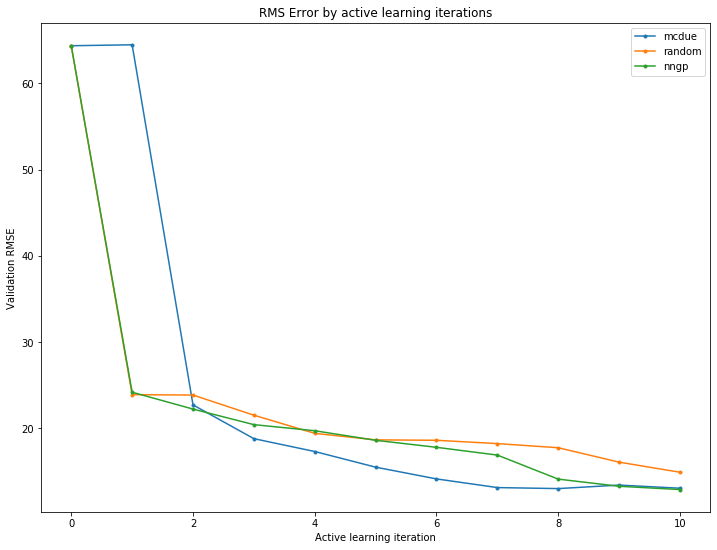

In [13]:
print(rmses)
plt.figure(figsize=(12, 9))
plt.xlabel('Active learning iteration')
plt.ylabel('Validation RMSE')
for experiment, rmse in rmses.items():
    plt.plot(rmse, label=experiment, marker='.')

plt.title('RMS Error by active learning iterations')
plt.legend()

In [ ]:
# Show some predictions
print(model.predict(data = X_test[:3]))
print(y_test[:3])

In [ ]:
# show some uncertainties
estimator.estimate(X_train, y_train, X_pool)[:10]